<a href="https://colab.research.google.com/github/anmar36a/Data-Analysis/blob/main/Car_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from google.colab import drive

In [2]:
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/Codigo/automotive'

Mounted at /content/drive


In [3]:
df = pd.read_csv(f'{data_dir}/car_data.csv')
df

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024


# Dataset info and preprocessing

In [4]:
# Interesting analysis:
# - Find which brands and type of cars are represented in the dataset
# - Check if miles per gallon is correlated with year of the car
# - Check miles per gallon by brand
# - Find the most efficient cars and its characteristics
# - Make a model that predicts miles per gallon based on vehicle data

In [5]:
df.isnull().sum()

,0
city_mpg,0
class,0
combination_mpg,0
cylinders,2
displacement,2
drive,0
fuel_type,0
highway_mpg,0
make,0
model,0


In [6]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [7]:
# Reorder columns
cols = df.columns.tolist()
cols

['city_mpg',
 'class',
 'combination_mpg',
 'cylinders',
 'displacement',
 'drive',
 'fuel_type',
 'highway_mpg',
 'make',
 'model',
 'transmission',
 'year']

In [8]:
cols = ['make',
 'model',
 'class',
 'year',
 'cylinders',
 'displacement',
 'drive',
 'transmission',
 'fuel_type',
 'city_mpg',
 'highway_mpg',
 'combination_mpg',
 ]

df = df[cols]
df

,make,model,class,year,cylinders,displacement,drive,transmission,fuel_type,city_mpg,highway_mpg,combination_mpg
0,mazda,6,midsize car,2014,4.0,2.5,fwd,m,gas,25,36,29
1,mazda,6,midsize car,2014,4.0,2.5,fwd,a,gas,26,37,30
2,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.5,fwd,a,gas,25,31,27
3,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.0,fwd,m,gas,26,34,29
4,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.0,fwd,a,gas,26,32,28
...,...,...,...,...,...,...,...,...,...,...,...,...
545,bmw,430i xdrive gran coupe,compact car,2024,4.0,2.0,awd,a,gas,23,33,27
546,bmw,840i gran coupe,midsize car,2024,6.0,3.0,rwd,a,gas,21,29,24
547,bmw,840i xdrive gran coupe,midsize car,2024,6.0,3.0,awd,a,gas,21,29,24
548,bmw,m850i xdrive gran coupe,midsize car,2024,8.0,4.4,awd,a,gas,17,24,19


# Analysis

In [9]:
for i in df.columns:
  if i not in ['model', 'city_mpg', 'highway_mpg', 'combination_mpg']:
    print(df[f'{i}'].value_counts())

make
bmw                  72
jaguar               71
kia                  69
mini                 51
hyundai              38
audi                 31
genesis              26
chevrolet            23
jeep                 22
mazda                21
land rover           16
gmc                  12
honda                11
acura                11
mitsubishi           10
subaru               10
volvo                 8
toyota                7
ford                  6
cadillac              6
volkswagen            5
nissan                4
buick                 4
aston martin          3
roush performance     2
bentley               2
porsche               2
infiniti              2
ram                   2
mercedes-benz         2
chrysler              1
Name: count, dtype: int64
class
small sport utility vehicle       157
subcompact car                     85
compact car                        83
two seater                         69
midsize car                        53
standard sport utility vehicl

## Miles per galon distributions

In [26]:
# Display mpg distribution by different variables
def get_mean_mpg(column: str):
  try:
    df_grouped = df.groupby(f'{column}')[['city_mpg', 'highway_mpg', 'combination_mpg']].agg('mean')
  except KeyError:
    print(f'Error!! The given column is not in the dataframe\n The columns are {df.columns}')
  df_grouped['count'] = df[f'{column}'].value_counts()
  df_grouped.sort_values('combination_mpg', ascending=False, inplace=True)
  return df_grouped

In [19]:
get_mean_mpg('year')

,city_mpg,highway_mpg,combination_mpg,count
year,,,,
2021,23.76,30.14,26.10,50
2020,23.24,30.20,25.92,50
2016,23.28,30.08,25.88,50
2022,23.04,29.76,25.52,50
2017,22.52,29.10,25.00,50
2024,21.80,29.78,24.58,50
2019,20.68,28.34,23.52,50
2018,20.04,28.56,23.06,50
2023,20.52,27.18,22.82,50


In [90]:
def lineplot_mpg(dataframe: pd.DataFrame):

  dataframe.sort_values(dataframe.index.name, inplace=True)

  sns.lineplot(data=dataframe[['city_mpg', 'highway_mpg', 'combination_mpg']], markers=True)
  plt.title(f'Miles per gallon by {dataframe.index.name}')
  plt.grid(visible=True)
  plt.ylabel('Miles per gallon')
  plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right')
  plt.show()

In [95]:
def barplot_mpg(dataframe: pd.DataFrame):

  dataframe.sort_values(dataframe.index.name, inplace=True)

  sns.barplot(data=dataframe['combination_mpg'])
  plt.title(f'Miles per gallon by {dataframe.index.name}')
  plt.ylabel('Miles per gallon')
  plt.xticks(rotation=90)
  plt.show()

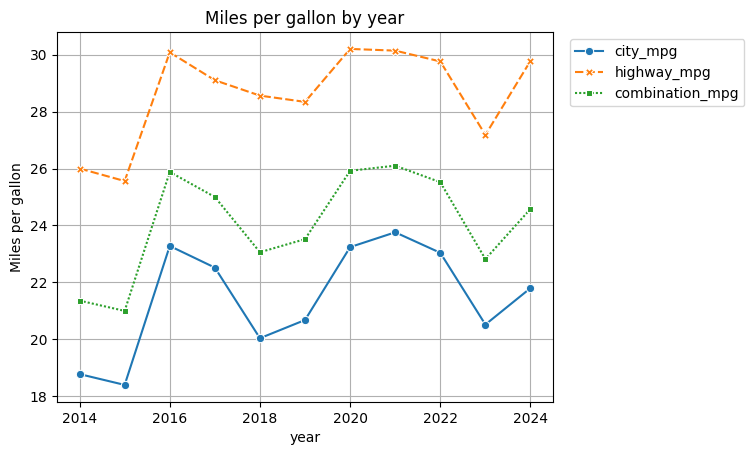

In [92]:
lineplot_mpg(get_mean_mpg('year'))

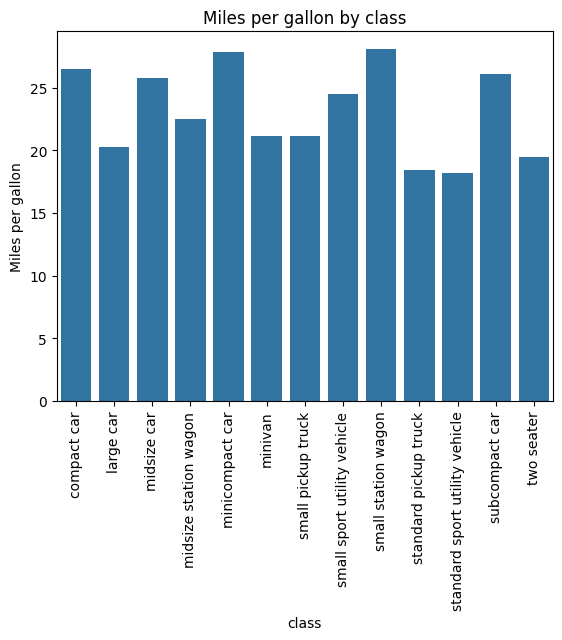

In [75]:
barplot_mpg(get_mean_mpg('class'))

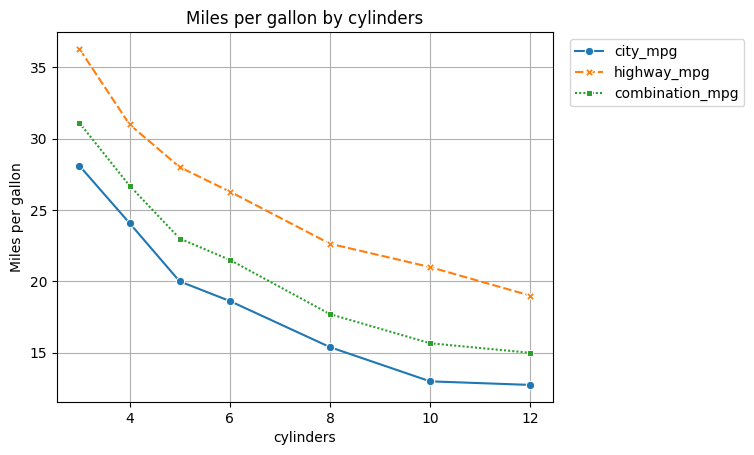

In [59]:
lineplot_mpg(get_mean_mpg('cylinders'))

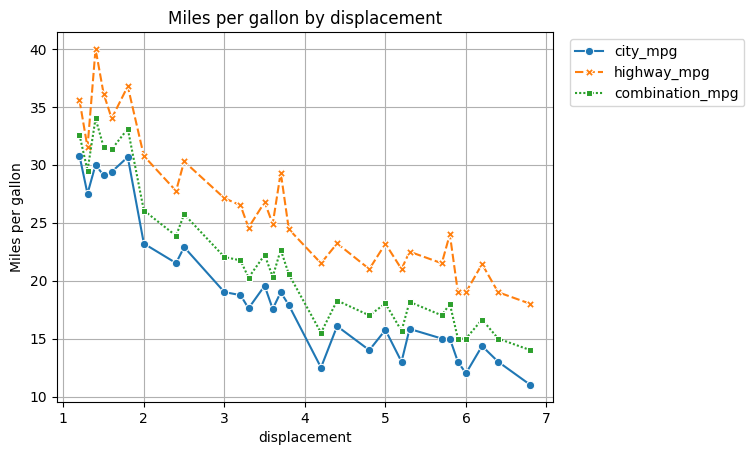

In [61]:
lineplot_mpg(get_mean_mpg('displacement'))

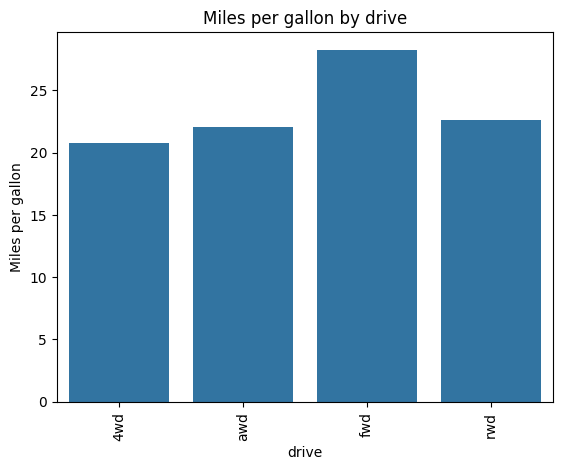

In [76]:
barplot_mpg(get_mean_mpg('drive'))

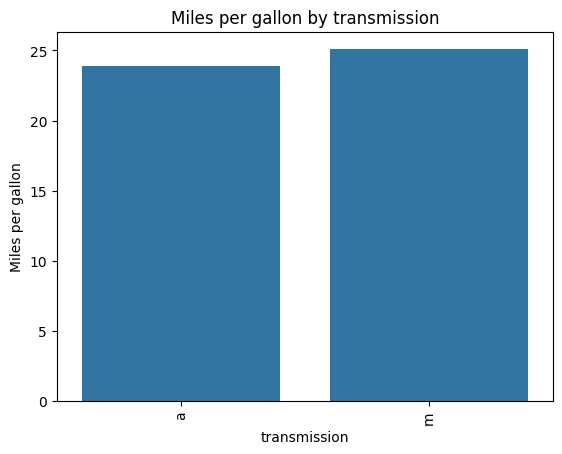

In [81]:
barplot_mpg(get_mean_mpg('transmission'))

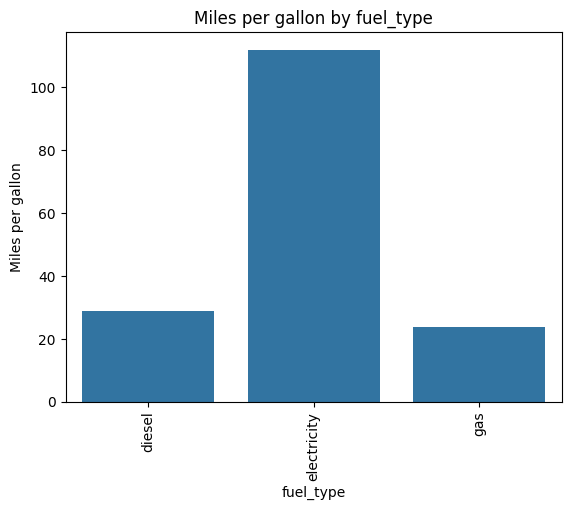

In [96]:
barplot_mpg(get_mean_mpg('fuel_type'))